In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


In [2]:
# Loading Dataset

df = pd.read_csv("/content/Cardiotocographic.csv")
print("Shape:",df.shape)
df.head()

Shape: (2126, 14)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
# Data Cleaning & Preparation
# Check info
df.info()
print("\n")

# Missing Values
print("Missing Values:\n", df.isnull().sum())
print("\n")
# Convert object - numeric
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = pd.to_numeric(df[col],errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


Missing Values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         

In [5]:
# Impute missing numeric values with median
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

print("After imputation:\n", df.isnull().sum())

After imputation:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


/tmp/ipython-input-2077413544.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [6]:
summary_stats = df.describe().T
summary_stats["median"] = df.median()
summary_stats["IQR"] = df.quantile(0.75) - df.quantile(0.25)
summary_stats

,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,2126.0,133.340204,11.214379,51.842487,126.000000,133.000000,140.000000,214.000000,133.000000,14.000000
AC,2126.0,0.003204,0.004373,-0.019284,0.000000,0.001634,0.005606,0.038567,0.001634,0.005606
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268,0.000000,0.002567
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002,0.004484,0.004685
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769,0.000000,0.003289
DS,2126.0,0.000002,0.000141,-0.001353,0.000000,0.000000,0.000000,0.002706,0.000000,0.000000
DP,2126.0,0.000173,0.000836,-0.005348,0.000000,0.000000,0.000000,0.010695,0.000000,0.000000
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000,49.000000,29.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000,1.200000,1.000000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000,0.000000,11.000000


In [8]:
# Outlier Detection
outlier_counts = {}
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outlier_counts[col] = (df[col] < lower) | (df[col] > upper).sum()

pd.Series(outlier_counts)

,0
LB,0 True 1 True 2 True 3 ...
AC,0 True 1 True 2 True 3 ...
FM,0 True 1 True 2 True 3 ...
UC,0 True 1 True 2 True 3 ...
DL,0 True 1 True 2 True 3 ...
DS,0 True 1 True 2 True 3 ...
DP,0 True 1 True 2 True 3 ...
ASTV,0 True 1 True 2 True 3 ...
MSTV,0 True 1 True 2 True 3 ...
ALTV,0 True 1 True 2 True 3 ...


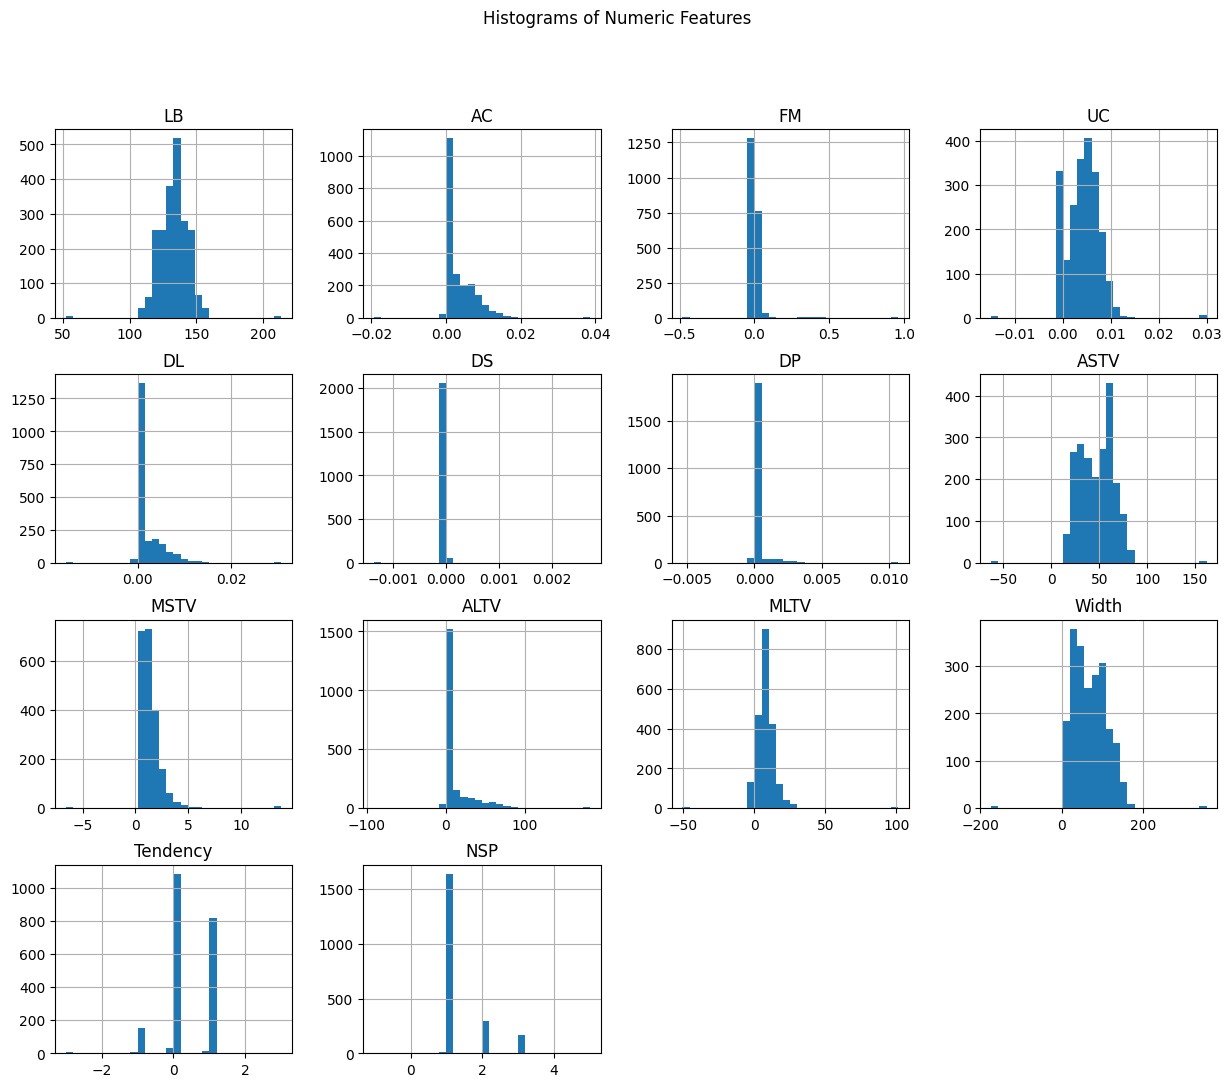

In [16]:
# Data Visualization
# Histograms
df.hist(figsize=(15,12), bins=30)
plt.suptitle("Histograms of Numeric Features")
plt.show()



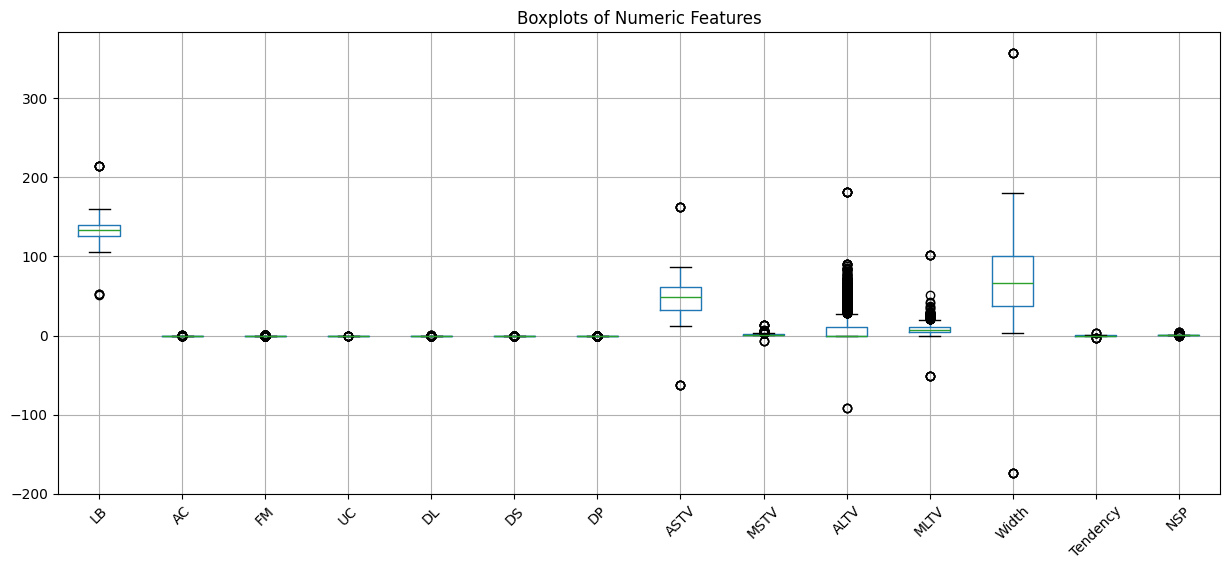

In [11]:
# Boxplots
plt.figure(figsize=(15,6))
df.boxplot(rot=45)
plt.title("Boxplots of Numeric Features")
plt.show()

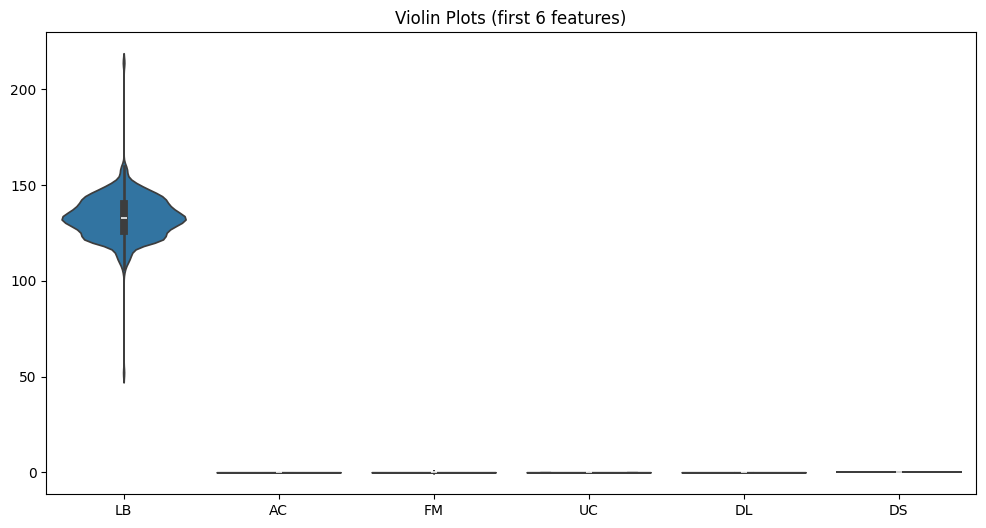

In [12]:
# Violin plots (first 6 numeric columns)
plt.figure(figsize=(12,6))
sns.violinplot(data=df.iloc[:, :6])
plt.title("Violin Plots (first 6 features)")
plt.show()

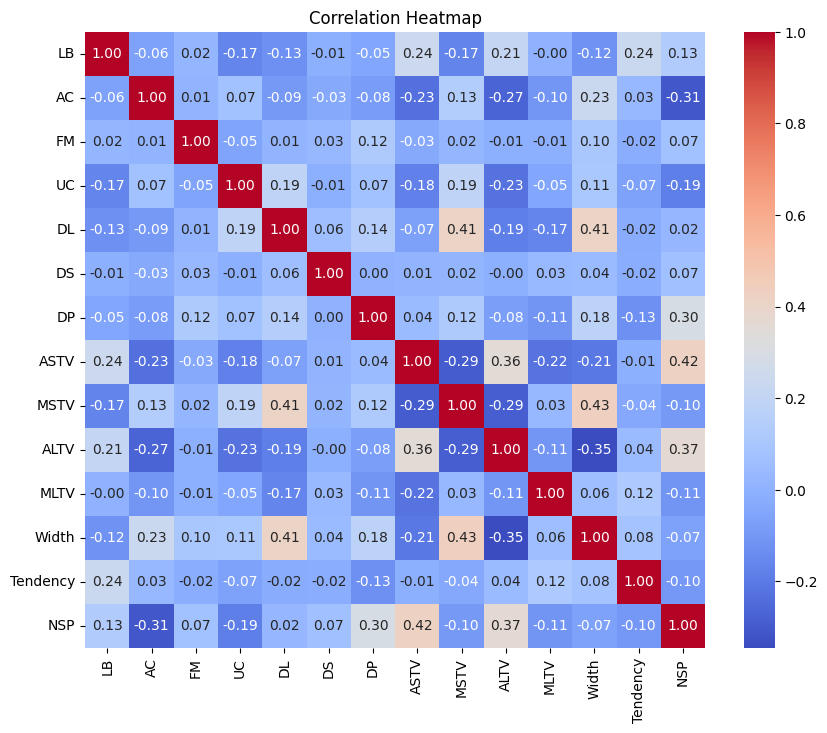

In [13]:
# Correlation heatmap
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

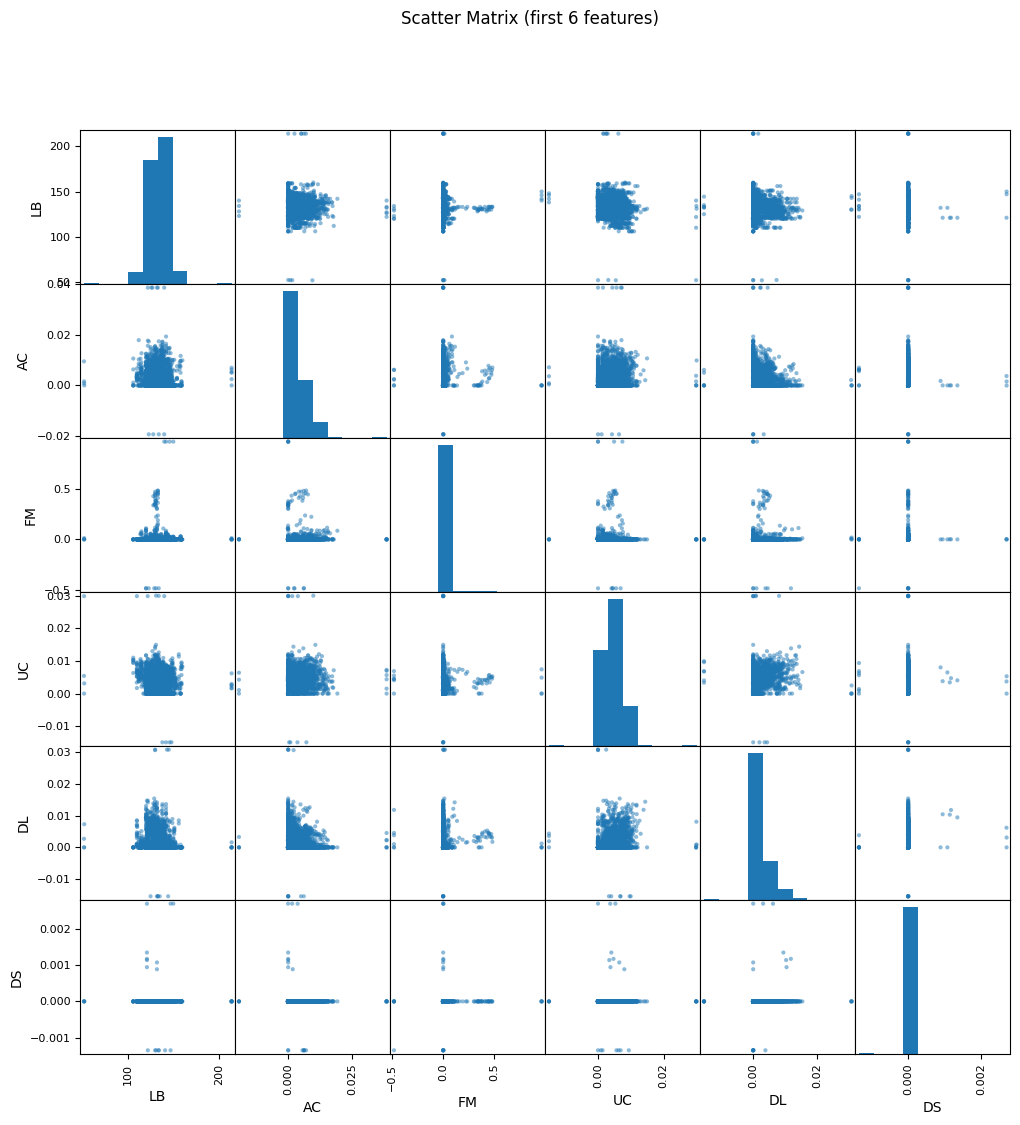

In [14]:
# Scatter matrix
scatter_matrix(df.iloc[:, :6], figsize=(12, 12), diagonal='hist')
plt.suptitle("Scatter Matrix (first 6 features)")
plt.show()

In [15]:
# Pattern Recognition & Insights
# Top correlations
corr_pairs = corr.abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 0.999]   # remove self-correlation
corr_pairs.head(10)


MSTV   Width    0.432822
Width  MSTV     0.432822
NSP    ASTV     0.420873
ASTV   NSP      0.420873
MSTV   DL       0.410102
DL     MSTV     0.410102
       Width    0.408578
Width  DL       0.408578
ALTV   NSP      0.366454
NSP    ALTV     0.366454
dtype: float64

**Conclusions:**
- Data cleaned with missing values imputed using median.
- Several features (AC, DL, DS, DP) are highly skewed with many zeros.
- ASTV and ALTV show wide variability; ALTV median is 0 with a long tail.
- Moderate correlations found (0.3–0.43) between MSTV-Width, NSP-ASTV, MSTV-DL etc.
- Visualizations reveal skewness and outliers in features like DL, DS, DP, ALTV.
- These findings suggest careful feature scaling/selection and domain-expert review before modeling.